In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns

In [17]:
df=pd.read_csv('employees.csv')

In [18]:
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


# Data Inspection and Exploration

In [19]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

# Check the information

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


# check categorical and numerical Data

In [21]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print(cat_col)
num_col = [col for col in df.columns if df[col].dtype != 'object']
print(num_col)

['First Name', 'Gender', 'Start Date', 'Last Login Time', 'Senior Management', 'Team']
['Salary', 'Bonus %']


# check null values

In [22]:
df.isnull().sum()

First Name            67
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64

# Data Cleaning

In [23]:
df['Start Date']=pd.to_datetime(df['Start Date'])

In [24]:
df['Gender'].fillna("No Gender", inplace= True)

In [25]:
df.isnull().sum()

First Name           67
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management    67
Team                 43
dtype: int64

In [26]:
mode=df['Senior Management'].mode().values[0]

In [27]:
df['Senior Management']=df['Senior Management'].replace(np.nan, mode)

In [28]:
df.isnull().sum()

First Name           67
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management     0
Team                 43
dtype: int64

In [29]:
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,1993-08-06,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,1996-03-31,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,1993-04-23,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,2005-03-04,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1998-01-24,4:47 PM,101004,1.389,True,Client Services


In [30]:
df1=df.dropna(axis=0, how='any')

In [31]:
df1.isnull().sum()

First Name           0
Gender               0
Start Date           0
Last Login Time      0
Salary               0
Bonus %              0
Senior Management    0
Team                 0
dtype: int64

# One Hot Encoding

In [32]:
pd.get_dummies(df1,columns=['Gender','Senior Management'])

,First Name,Start Date,Last Login Time,Salary,Bonus %,Team,Gender_Female,Gender_Male,Gender_No Gender,Senior Management_False,Senior Management_True
0,Douglas,1993-08-06,12:42 PM,97308,6.945,Marketing,False,True,False,False,True
2,Maria,1993-04-23,11:17 AM,130590,11.858,Finance,True,False,False,True,False
3,Jerry,2005-03-04,1:00 PM,138705,9.340,Finance,False,True,False,False,True
4,Larry,1998-01-24,4:47 PM,101004,1.389,Client Services,False,True,False,False,True
5,Dennis,1987-04-18,1:35 AM,115163,10.125,Legal,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
995,Henry,2014-11-23,6:09 AM,132483,16.655,Distribution,False,False,True,True,False
996,Phillip,1984-01-31,6:30 AM,42392,19.675,Finance,False,True,False,True,False
997,Russell,2013-05-20,12:39 PM,96914,1.421,Product,False,True,False,True,False
998,Larry,2013-04-20,4:45 PM,60500,11.985,Business Development,False,True,False,True,False


# Data Visualization

# It can also be used for univariate and bivariate analyses.

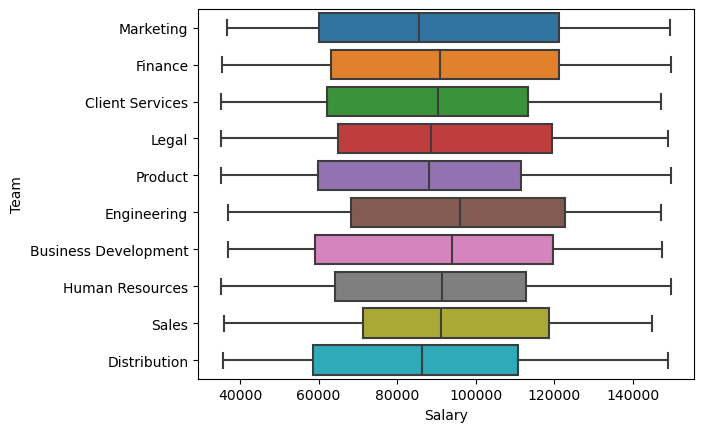

In [33]:
sns.boxplot(x='Salary',y='Team',data=df1)
plt.show()

# It can be used for bivariate analyses.

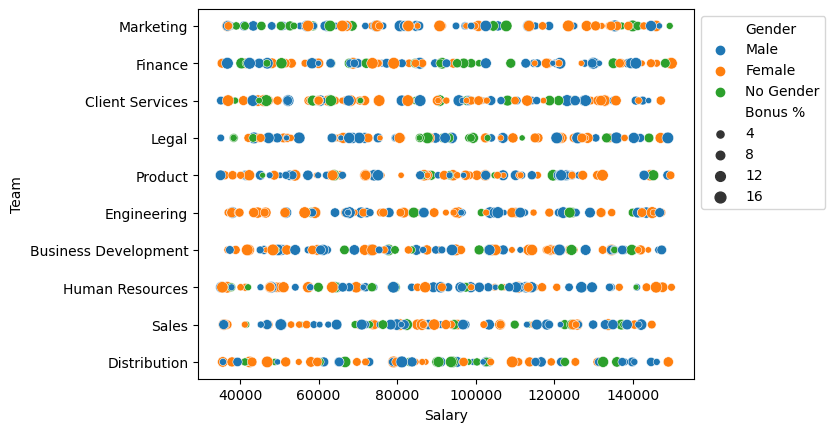

In [34]:
sns.scatterplot(x='Salary', y='Team', data=df1,hue='Gender', size='Bonus %')
plt.legend(bbox_to_anchor=(1,1), loc=2)
plt.show()

# For multivariate analysis, we can use pairplot()method of the seaborn module. We can also use it for the multiple pairwise bivariate distributions in a dataset.

C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


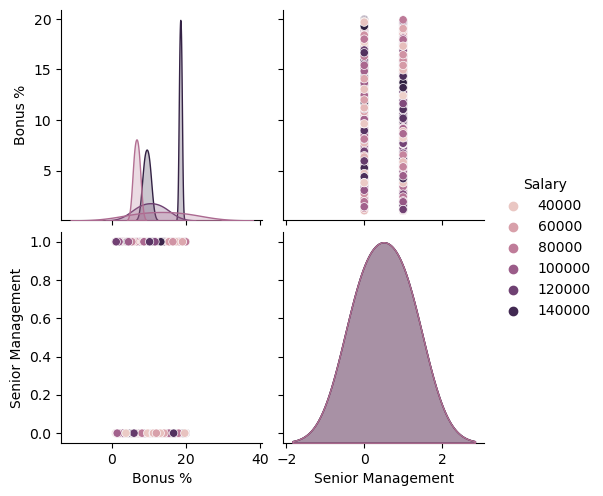

In [35]:
sns.pairplot (df1, hue='Salary')
plt.show()

# Handle Outlier

In [36]:
mean=df1['Salary'].mean()
std=df1['Salary'].std()

lower_bound=mean-std*2
upper_bound=mean+std*2

In [37]:
print(lower_bound)
print(upper_bound)

24991.92199303081
155967.42394690245
